In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as sts
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn import metrics

In [2]:
# Reading and printing the top 5 data
df = pd.read_csv("./placement_data.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# Getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
# Check for null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
# As it is classifier we need to seperate both numerical and caterogical columns in the datset
cate = list(df.select_dtypes(include=['object']).columns)
numb = list(df.select_dtypes(include=['int64','float64',]).columns)
print(cate,numb)


['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [6]:
# Getting the shape of the df
df.shape

(215, 15)

In [7]:
# Creating a function to display the plots
def plot(col):
    plt.figure(figsize=(7,5))
    sns.distplot(df['salary'],kde=True,hist=False,label='Actual Salary',color='orange')
    sns.distplot(df[col],kde=True,hist=False,label=col,color='green')

In [8]:
# Most frequently occuring value for salary and number of times
mostfre = list(dict(df['salary'].value_counts()).items())[0]
mostfre

(300000.0, 22)

In [9]:
# We will create 3 variables called salary mean, salary mode, salary median and see which plots are nearest and then fix them
df['salary_mean'] = df['salary'].fillna(df['salary'].mean())
df['salary_median'] = df['salary'].fillna(df['salary'].median())
df['salary_mode'] = df['salary'].fillna(df['salary'].mode()[0])

In [10]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


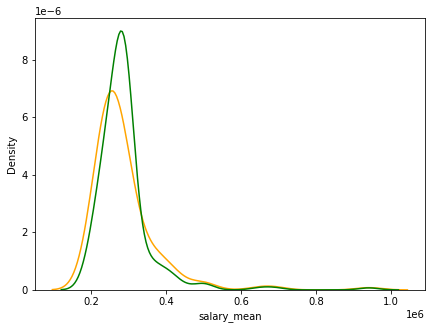

In [11]:
plot('salary_mean')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


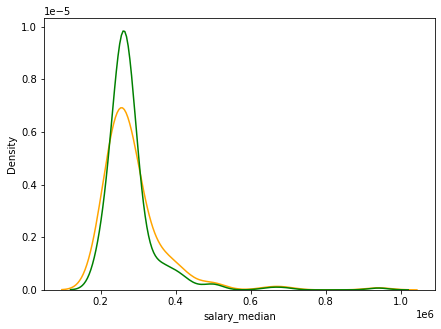

In [12]:
plot('salary_median')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


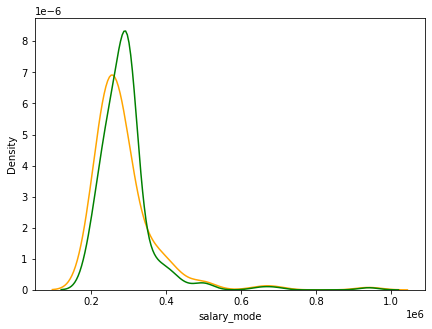

In [13]:
plot('salary_mode')

In [14]:
# As we have nearest cover to be mean so we replace the null values in salary with mean
df.salary = df.salary.fillna(df.salary_mean)
df = df.drop(columns=['salary_mean','salary_mode','salary_median'],axis=1)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [15]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


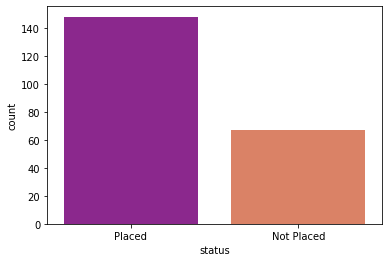

In [16]:
# Data analysis
sns.countplot(df['status'],palette='plasma')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The counts of gender is shown below 
{'M': 139, 'F': 76}


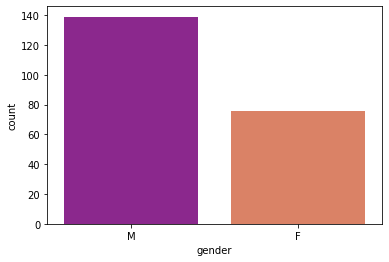

----------------------------------------------------------------------------------------------------
The counts of ssc_b is shown below 
{'Central': 116, 'Others': 99}


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


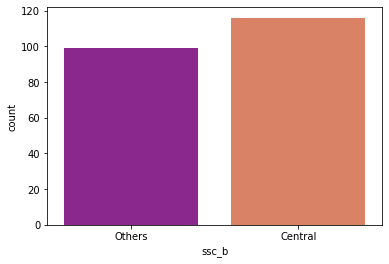

----------------------------------------------------------------------------------------------------
The counts of hsc_b is shown below 
{'Others': 131, 'Central': 84}


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


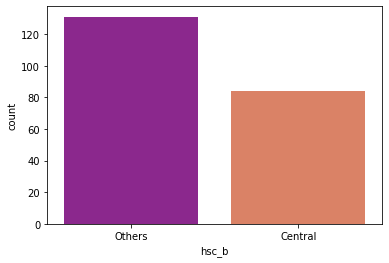

----------------------------------------------------------------------------------------------------
The counts of hsc_s is shown below 
{'Commerce': 113, 'Science': 91, 'Arts': 11}


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


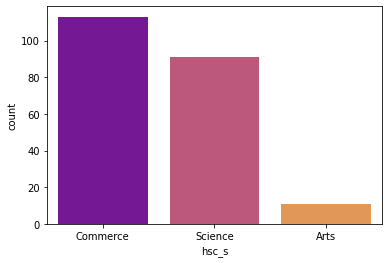

----------------------------------------------------------------------------------------------------
The counts of degree_t is shown below 
{'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11}


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


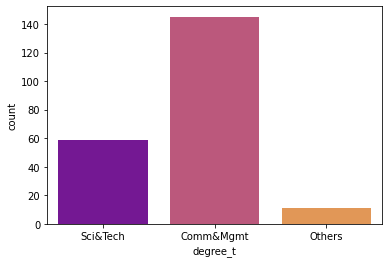

----------------------------------------------------------------------------------------------------
The counts of workex is shown below 
{'No': 141, 'Yes': 74}


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


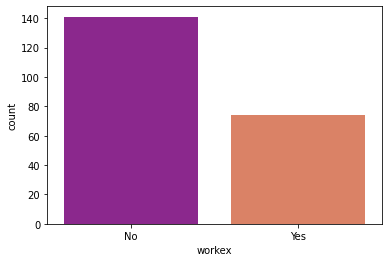

----------------------------------------------------------------------------------------------------
The counts of specialisation is shown below 
{'Mkt&Fin': 120, 'Mkt&HR': 95}


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


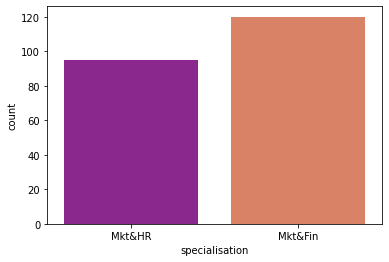

----------------------------------------------------------------------------------------------------
The counts of status is shown below 
{'Placed': 148, 'Not Placed': 67}


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


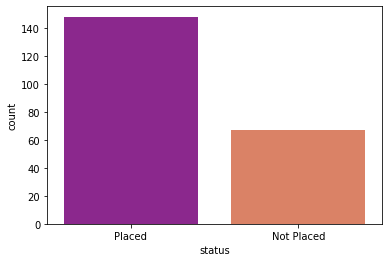

----------------------------------------------------------------------------------------------------


In [17]:
def vals(col):
    return dict(df[col].value_counts())

def plot(col):
    sns.countplot(df[col],palette='plasma')
    plt.show()

for i in cate:
    print(f'The counts of {i} is shown below ')
    print(vals(i))
    plot(i)
    print("-"*100)

In [18]:
final = {}
for i in cate:
    final[i] = vals(i)

final

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [19]:
boolcols = [key for key,value in final.items() if len(final[key])==2]
tripcols = [key for key in list(final.keys()) if key not in boolcols]

print(boolcols,tripcols)

['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status'] ['hsc_s', 'degree_t']


In [20]:
def labelencode(le,col):
    
    df[col] = le.fit_transform(df[col])
    
    
getmappings = {}
le = LabelEncoder()
for col in list(final.keys()):
    labelencode(le,col)
    getmappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))
    

df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [21]:
# removing unwated columns

df = df.drop(['sl_no'],axis=1)
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0


In [22]:
# Numerical Columns data analysis
numb[1:]

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [23]:
def plots(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='orange')

    plt.subplot(1,3,2)
    sts.probplot(df[col],dist='norm',plot=plt)

    plt.subplot(1,3,3)
    sns.boxplot(df[col],color='green')

    plt.show()

Number columns analysis plots for columns : ssc_p is given bellow : 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


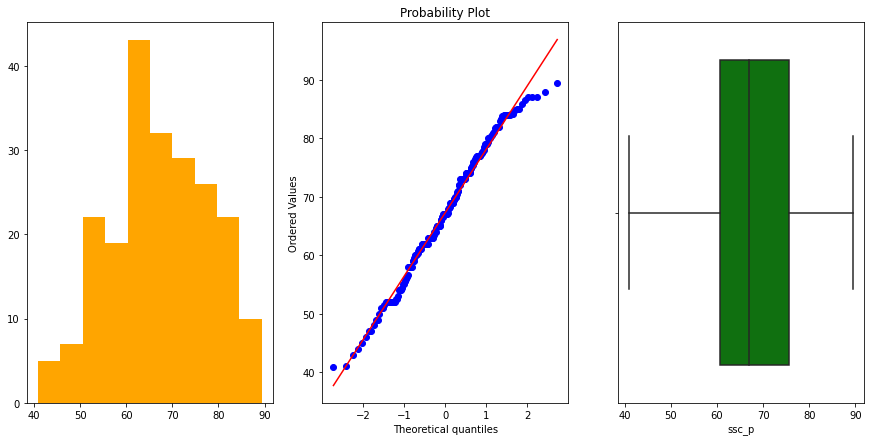

----------------------------------------------------------------------------------------------------
Number columns analysis plots for columns : hsc_p is given bellow : 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


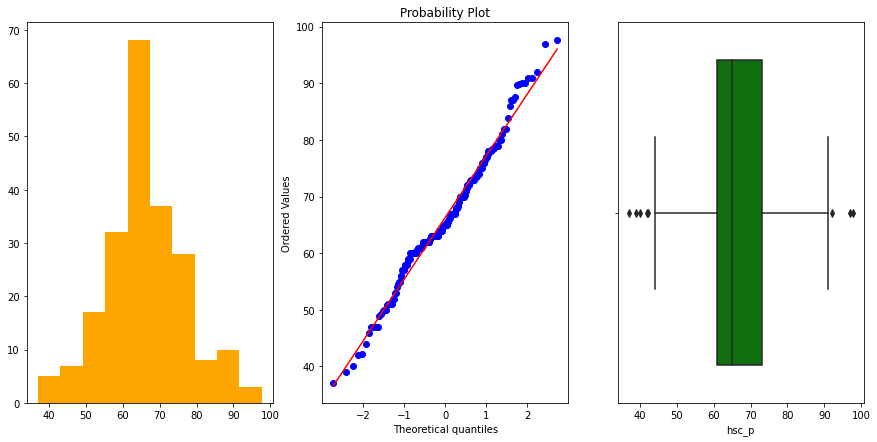

----------------------------------------------------------------------------------------------------
Number columns analysis plots for columns : degree_p is given bellow : 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


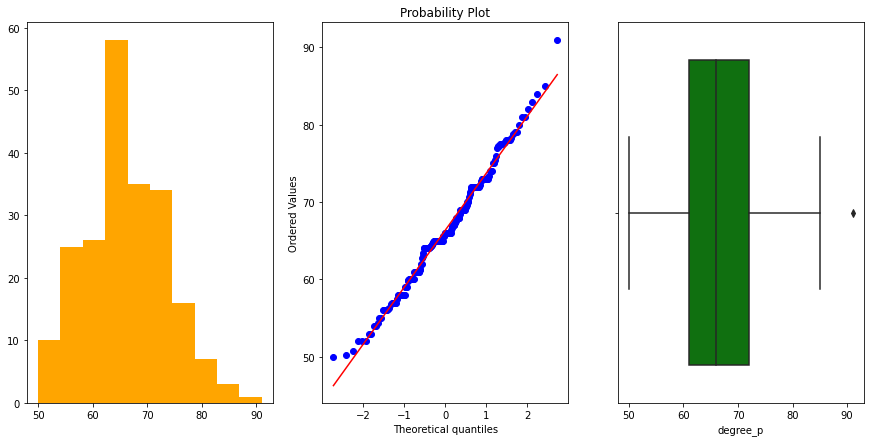

----------------------------------------------------------------------------------------------------
Number columns analysis plots for columns : etest_p is given bellow : 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


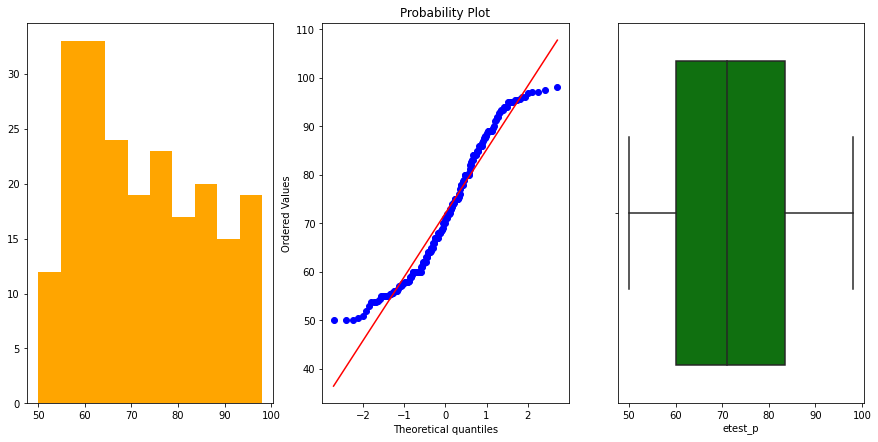

----------------------------------------------------------------------------------------------------
Number columns analysis plots for columns : mba_p is given bellow : 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


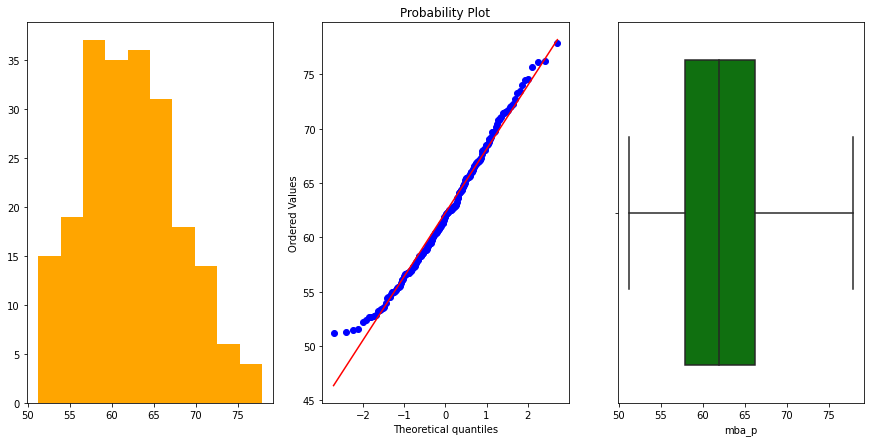

----------------------------------------------------------------------------------------------------
Number columns analysis plots for columns : salary is given bellow : 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


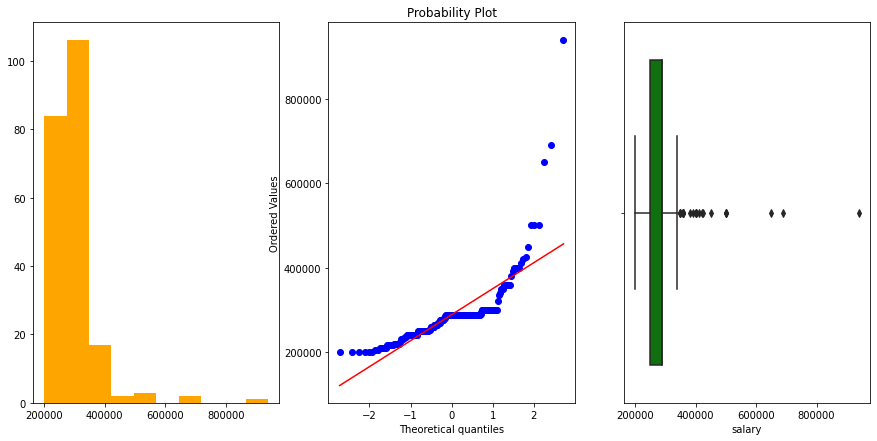

----------------------------------------------------------------------------------------------------


In [24]:
for col in numb[1:]:
    print(f'Number columns analysis plots for columns : {col} is given bellow : ')
    plots(df,col)
    print("-"*100)

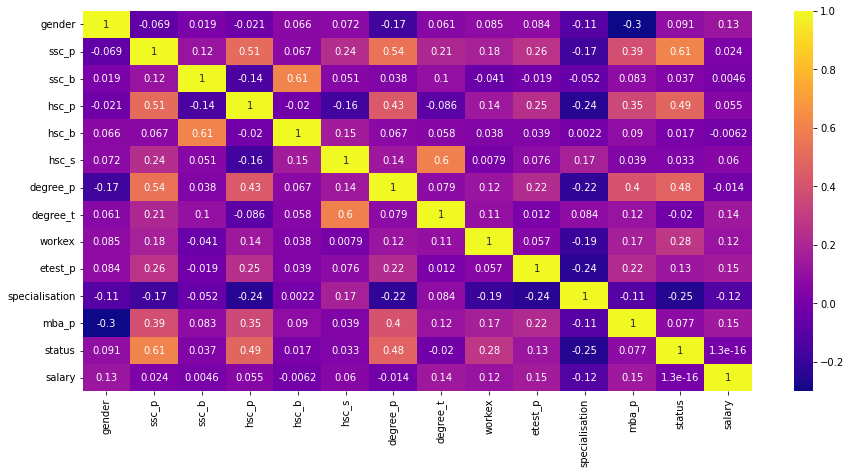

In [25]:
# checking for tightly correlated features

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [26]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000


In [27]:
# We will remove the salary as well as it is defined with the placement
data = df.copy()
test = data['status']
train = data.drop(columns=['status','salary'],axis=1)
train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [28]:
etc = ExtraTreesClassifier()
etc.fit(train,test)

ExtraTreesClassifier()

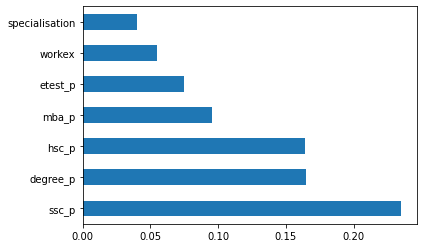

In [29]:
featbar = pd.Series(etc.feature_importances_,index=train.columns)
featbar.nlargest(7).plot(kind = 'barh')

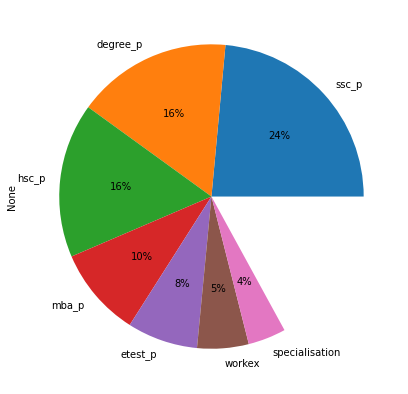

In [30]:
# We got ssc_p has more weightage but we cannot get the percent so we are going with pie chart
featbar.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize = (15,7))

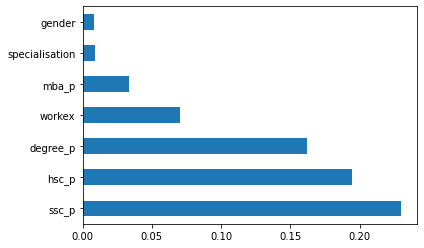

In [31]:
# as taking a single way doesnt make up good accuracy we also go with mutual info classif as it is a classification problem

mic = mutual_info_classif(train,test)
dfs = pd.Series(mic,index=train.columns)
dfs.nlargest(7).plot(kind = 'barh')

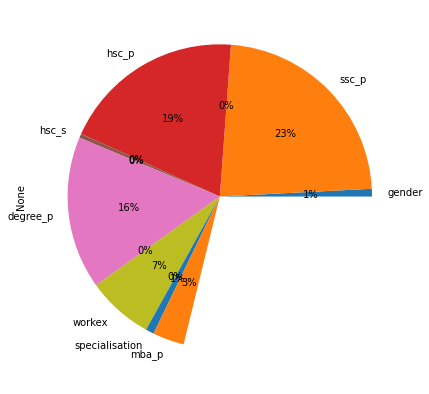

In [32]:
pd.Series(mic,index=train.columns).plot(kind = 'pie',autopct='%1.0f%%',figsize = (15,7))

In [33]:
featcol = list(featbar.nlargest(10).index)
mutclasif = list(dfs.nlargest(10).index)
commoncols = list(set(featcol).intersection(set(mutclasif)))
print(commoncols)

['degree_p', 'specialisation', 'ssc_p', 'workex', 'hsc_p', 'gender', 'hsc_s', 'mba_p']


In [34]:
# Selecting the common top columns to train dataset
train = df[commoncols]
train.head()

,degree_p,specialisation,ssc_p,workex,hsc_p,gender,hsc_s,mba_p
0,58.00,1,67.00,0,91.00,1,1,58.80
1,77.48,0,79.33,1,78.33,1,2,66.28
2,64.00,0,65.00,0,68.00,1,0,57.80
3,52.00,1,56.00,0,52.00,1,2,59.43
4,73.30,0,85.80,0,73.60,1,1,55.50


In [35]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2)
X_train.shape,X_test.shape

((172, 8), (43, 8))

In [36]:
# random forest model


rf = RandomForestClassifier(ccp_alpha=0.02, max_depth=30, max_features='sqrt',
                         min_samples_leaf=2, min_samples_split=12,
                         n_estimators=267)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7906976744186046


In [37]:
# saving the model

import pickle
file = open('placementpredictor.pkl','wb')
pickle.dump(rf,file)
file.close()